## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
X = pd.read_csv('.\Training data\Linear_X_Train.csv')
Y = pd.read_csv('.\Training data\Linear_Y_Train.csv')

## Visualise Data

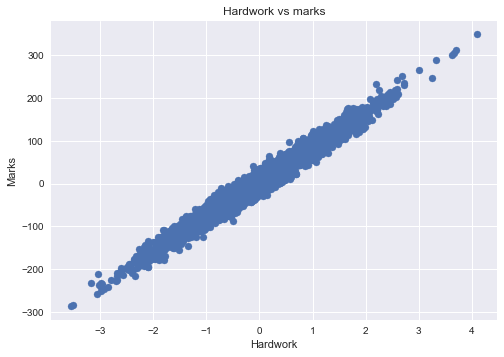

In [3]:
# x.shape, y.shape
plt.style.use('seaborn')
plt.scatter(X,Y, cmap="yellow")
plt.title("Hardwork vs marks")
plt.xlabel("Hardwork")
plt.ylabel("Marks")
plt.show()

In [4]:
type(X),type(Y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

As they are pandas dataframe we are converting to numpy array.

In [5]:
# Converting x,y to numpy arrays
X = X.values
Y = Y.values

print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Normalisation

In [6]:
u = X.mean()
std = X.std()
print(u,std) # std is about 1 means its almost normalised but still we are processing on it a little

-0.03779466168006854 0.9920801322508517


## Linear Regression

In [7]:
def hypothesis(x,theta):    # theta = [theta0,theta1]
    y_ = theta[0] + theta[1]*x  # y_ means y hat 
    return y_

def gradient(x,y,theta):    #x,y represents entire dataset
    m = x.shape[0]          # m is the no of data points, to make 3750 not (3750,1) 
    grad = np.zeros((2,))   # initial gradient value is zero
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]              # to make y = 3750 not (3750,1)
        grad[0] += (y_ - y)   # grad for theta0
        grad[1] += (y_ - y)*x  # grad for theta1
        
    return grad/m
        
        

In [8]:
def error(X, Y, theta):  # calculates diff between predicted and actual value
    m = X.shape[0]
    total_error=0.0
    for i in range(m):
        y_= hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return total_error/m



def gradientDescent (X,Y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        
        #compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        #update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta,error_list

In [9]:
theta,error_list = gradientDescent(X,Y)

In [14]:
# theta


In [15]:
# error_list

Text(0.5, 1.0, 'Reduction error over epochs')

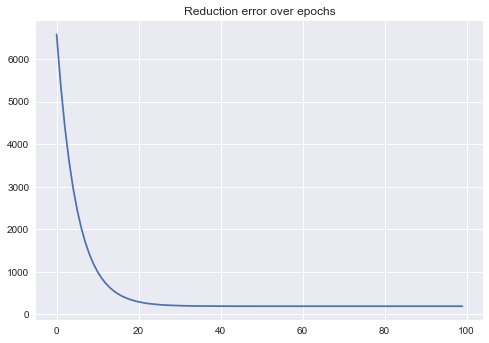

In [12]:
plt.plot(error_list)
plt.title("Reduction error over epochs")

## Prediction and Best Line

In [13]:
y_ = hypothesis(X,theta)

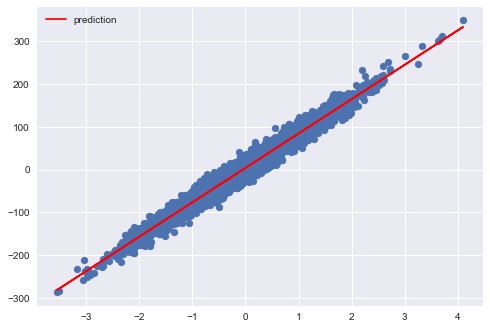

In [17]:
plt.scatter(X,Y) # plotting training dataset
plt.plot(X,y_,color="red",label="prediction") # predicted line
plt.legend() 
plt.show()

In [21]:
# loading the test data

# .values is to convert it into numpy array
X_test = pd.read_csv('Linear_X_Test.csv').values # test dataset
Y_test = hypothesis (X_test,theta) # actual output if test data is passed

In [27]:
df = pd.DataFrame(data=Y_test,columns=["y"])
    

In [29]:
df.to_csv('y_prediction.csv',index=False)